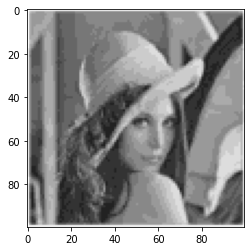

recvd image
reception in 8 sec 100x100 sized image using 1 channel
baudrate: 10Kbps, freq1: 280Khz, freq2: 320KHz


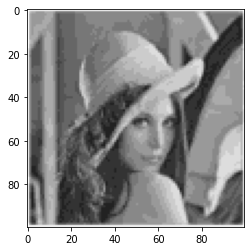

transmitted image


In [42]:
import re
import numpy as np
import matplotlib.pyplot as plt
import sys
import cv2
np.set_printoptions(threshold=sys.maxsize)
# Open the file in read mode
with open("received_grey_image.txt", "r") as file:
    # Extract image data lines
    image_lines = [line for line in file if re.match(r"\d{2}:\d{2}:\d{2}\.\d{3}\s+|\d{4}\s+", line)]

# Initialize image array
image_data = np.zeros((100, 100), dtype=np.uint8)
# Iterate through image lines and extract pixel values
pixel_index = 0

row_counter = 0
col_counter = 0
for line in image_lines:
    pixels = re.findall(r"\w{1}", line.split("|")[2].strip())
    for i in range(0, len(pixels), 1):
        pixel_value = int(pixels[i] , 16)  # Extract 4 most significant bits
        image_data[row_counter, col_counter] = pixel_value
        col_counter = col_counter + 1
        if(col_counter % 100 == 0):
            col_counter = 0
            row_counter = row_counter + 1


# Display the reconstructed image
plt.imshow(image_data, cmap='gray', vmin=0, vmax=15)

plt.show()
print("recvd image")
print("reception in 8 sec 100x100 sized image using 1 channel")
print("baudrate: 10Kbps, freq1: 280Khz, freq2: 320KHz")
image2 = cv2.imread('grey_scale_resized.jpeg')
image2 = cv2.resize(image2, (100,100))
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
data = np.uint8(gray / 16)
plt.imshow(data, cmap='gray', vmin=0, vmax=15)
plt.show()
print ("transmitted image")
